<a href="https://colab.research.google.com/github/flashouti/spotifyTask/blob/main/spotifyTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# /kaggle/input/song-popularity/dataset.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка датасета

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
%matplotlib inline

In [ ]:
data = pd.read_csv(f'/content/drive/MyDrive/dataset_spotify_init.csv')

In [ ]:
data_initial = data.copy(deep=True)

In [ ]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# Описание признаков

1. **Unnamed: 0** — столбец, дублирующий индекс

2. **track_id** — уникальный идентификатор трека. Используется для идентификации песни в базе данных.

3. **artists** — имя исполнителя или группы, записавшей трек.

4. **album_name** — название альбома, в который входит трек.

5. **track_name** — название трека.

6. **popularity** — показатель популярности трека, где большее значение означает более популярный трек. Значения в диапазоне от 0 до 100.

7. **duration_ms** — длительность трека в миллисекундах.

8. **explicit** — флаг, указывающий на наличие ненормативной лексики. Значение `True` означает, что трек содержит контент для взрослых, `False` — что не содержит.

9. **danceability** — коэффициент танцевальности. Это числовой показатель от 0 до 1, отражающий, насколько трек подходит для танцев.

10. **energy** — показатель «энергии» трека. Значение от 0 до 1, где высокий уровень энергии означает быстрый и громкий трек.

11. **key** — тональность трека, представлена в числовом виде.

12. **loudness** — средняя громкость трека в децибелах (dB), где более высокое значение соответствует более громкому треку.

13. **mode** — режим тональности, где `1` — мажор, `0` — минор.

14. **speechiness** — показатель речевого контента. Значение от 0 до 1, где более высокие значения означают большую долю слов в треке.

15. **acousticness** — показатель акустичности, от 0 до 1. Чем ближе к 1, тем выше вероятность, что трек является акустическим.

16. **instrumentalness** — показатель инструментальности, от 0 до 1, где значения ближе к 1 указывают на отсутствие вокала. Небольшие значения могут означать вокал или речь.

17. **liveness** — показатель «живости» трека, от 0 до 1. Более высокие значения указывают на присутствие аудитории и элементы живого исполнения.

18. **valence** — показатель настроения трека, от 0 до 1. Высокие значения означают «позитивное» звучание, тогда как низкие значения связаны с меланхоличным или негативным настроением.

19. **tempo** — темп трека.

20. **time_signature** — размер трека, который представляет количество долей в одном такте.

21. **track_genre** — жанр трека, такой как "acoustic", "pop", "rock", и т.д.


# Обработка датасета


In [ ]:
data['popularity'].value_counts()

,count
popularity,
0,16020
22,2354
21,2344
44,2288
1,2140
...,...
96,7
94,7
95,5


In [ ]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
data.shape

(113999, 21)

In [ ]:
data = data.drop(['Unnamed: 0', 'track_id'], axis=1)

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
numerical_features

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
categorical_features

['artists', 'album_name', 'track_name', 'track_genre']

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  int64  
 1   album_name        113999 non-null  int64  
 2   track_name        113999 non-null  int64  
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

# Аналитика

In [ ]:
import numpy as np

In [ ]:
sns.set(style="whitegrid")

## Распределение популярности треков

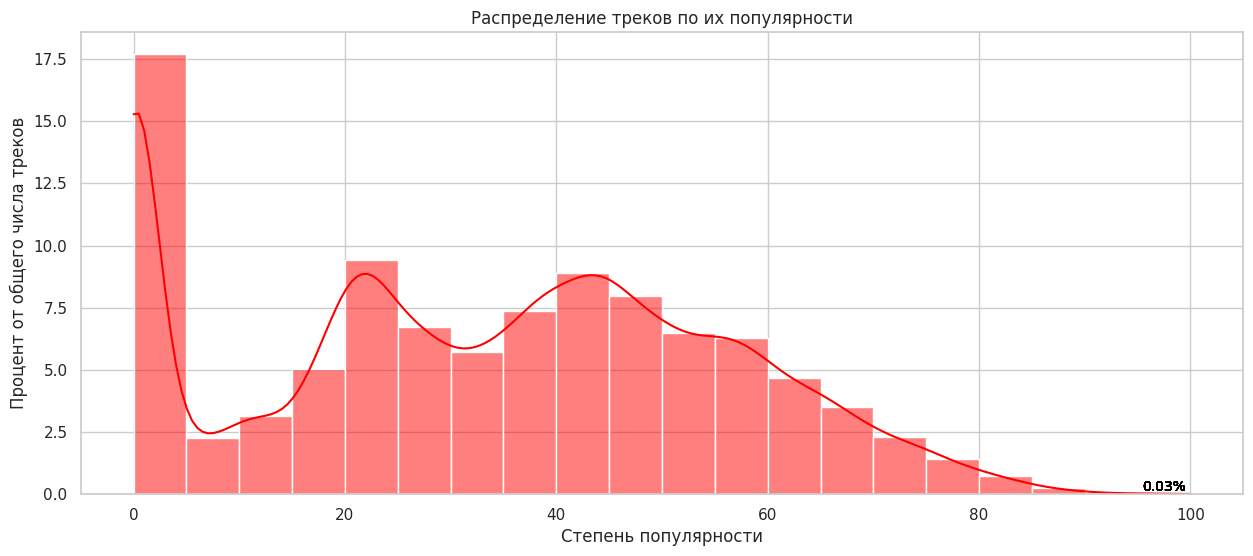

In [ ]:
plt.figure(figsize=(15, 6))
histplot = sns.histplot(data['popularity'], bins=20, kde=True, color='red', stat='percent')
plt.title('Распределение треков по их популярности')
plt.xlabel('Степень популярности')
plt.ylabel('Процент от общего числа треков')

for patch in histplot.patches:
    height = p.get_height()

    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%',
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Из графика можно сделать вывод, что больше всего треков с нулевой популярностью.Также много треков с популярностью от 20 до 60. Треков с популярностью 90-100, всего 0,03%


## Распределение треков по длительности


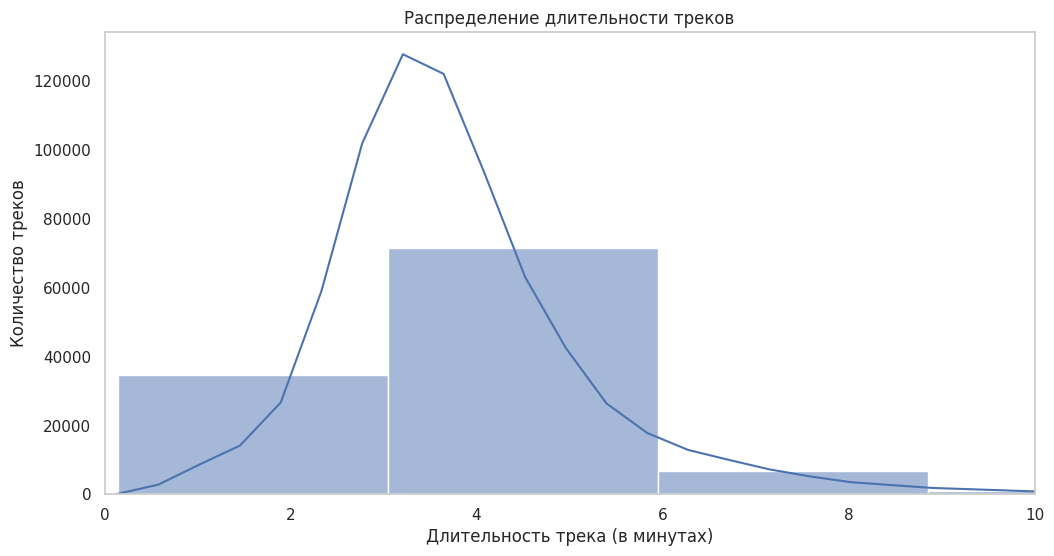

In [ ]:
data['duration_min'] = data['duration_ms'] / 60000

# Настройка графика
plt.figure(figsize=(12, 6))
sns.histplot(data['duration_min'], bins=30, kde=True)

# Установка пределов оси X
plt.xlim(0, 10)  # Устанавливаем пределы от 0 до 10 минут

plt.title('Распределение длительности треков')
plt.xlabel('Длительность трека (в минутах)')
plt.ylabel('Количество треков')
plt.grid()

plt.show()

Видно, что больше всего треков длительностью 3-5 минут




## Влияние длительности на популярность трека

In [ ]:
duration_min = data_initial['duration_ms'] / 60000
bins = [0, 1, 2, 3, 4, 5, 10, duration_min.max()]
labels = ['<1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '10+ мин']

data_initial['duration_category'] = pd.cut(duration_min, bins=bins, labels=labels)

duration_popularity = data_initial.groupby('duration_category')['popularity'].mean().reset_index()

<ipython-input-126-cb932e5c02b8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_popularity = data_initial.groupby('duration_category')['popularity'].mean().reset_index()


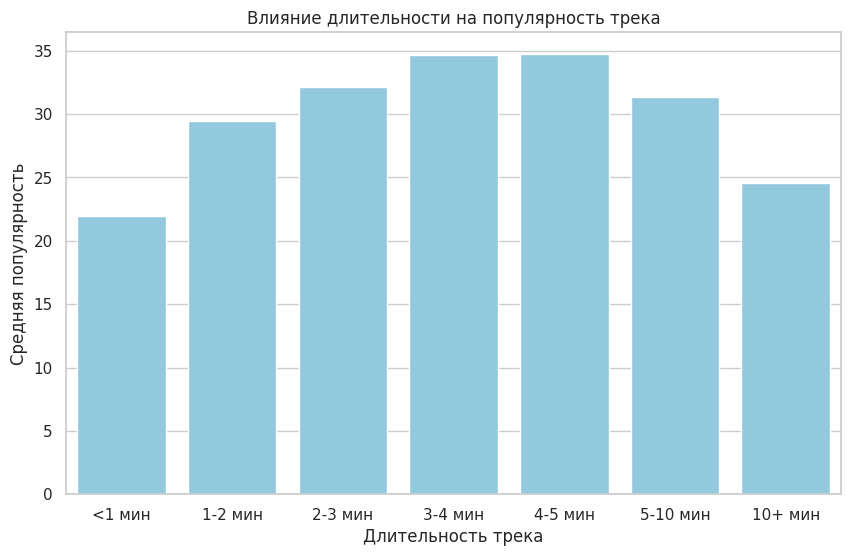

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=duration_popularity, x='duration_category', y='popularity', color='skyblue')

plt.title('Влияние длительности на популярность трека')
plt.xlabel('Длительность трека')
plt.ylabel('Средняя популярность')
plt.show()

Наибольшая средняя популярность у треков с длительностью от 3 до 5 минут. Следом идут треки с длительностью 2-3 минуты. Худшая популярность у треков с 10+ минут и у треков с продолжительностью мешьне одной минуты

##  Распределение треков по жанрам

In [ ]:
genre_counts = data_initial['track_genre'].value_counts()
genre_counts

,count
track_genre,
acoustic,1000
punk-rock,1000
progressive-house,1000
power-pop,1000
pop,1000
...,...
folk,1000
emo,1000
electronic,1000


Сделаю предположение, что на каждый жанр приходится по 1000 треков

In [ ]:
maximum_tracks_by_genre = genre_counts.max()
minimum_tracks_by_genre = genre_counts.min()

print(f'Максимум треков по жанрам: {maximum_tracks_by_genre}')
print(f'Минимум треков по жанрам: {minimum_tracks_by_genre}')

Максимум треков по жанрам: 1000
Минимум треков по жанрам: 1000


Предположение подтвердилось. На каждый жанр приходится по 1000 треков

## Влияние жанра на популярность

In [ ]:
genre_popularity = data_initial.groupby('track_genre')['popularity'].mean().reset_index()

# Сортируем по средней популярности (от популярного к непопулярному)
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

top_genres = genre_popularity.head(3)
bottom_genres = genre_popularity.tail(3)

selected_genres = pd.concat([top_genres, bottom_genres])

<ipython-input-131-780cf1d450f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_genres, x='track_genre', y='popularity', palette='viridis')


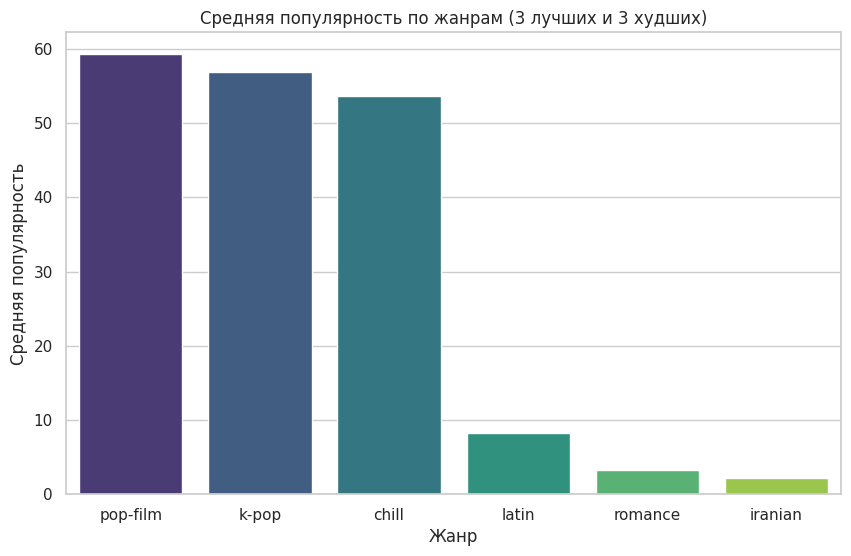

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_genres, x='track_genre', y='popularity', palette='viridis')

plt.title('Средняя популярность по жанрам (3 лучших и 3 худших)')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
# plt.xticks(rotation=45)  # Поворот меток на оси X для удобства
plt.show()

Видно, что:

* наибольшая популярность у таких жанров: *pop-film*, *k-pop* и *chill*
* Худшая средняя популярность у таких жанров: *latin*, *romance* и *iranian*

Из этого можно сделать вывод, что жанр сильно влияет на популярность

## Распределение треков с ненормативной лексикой и без

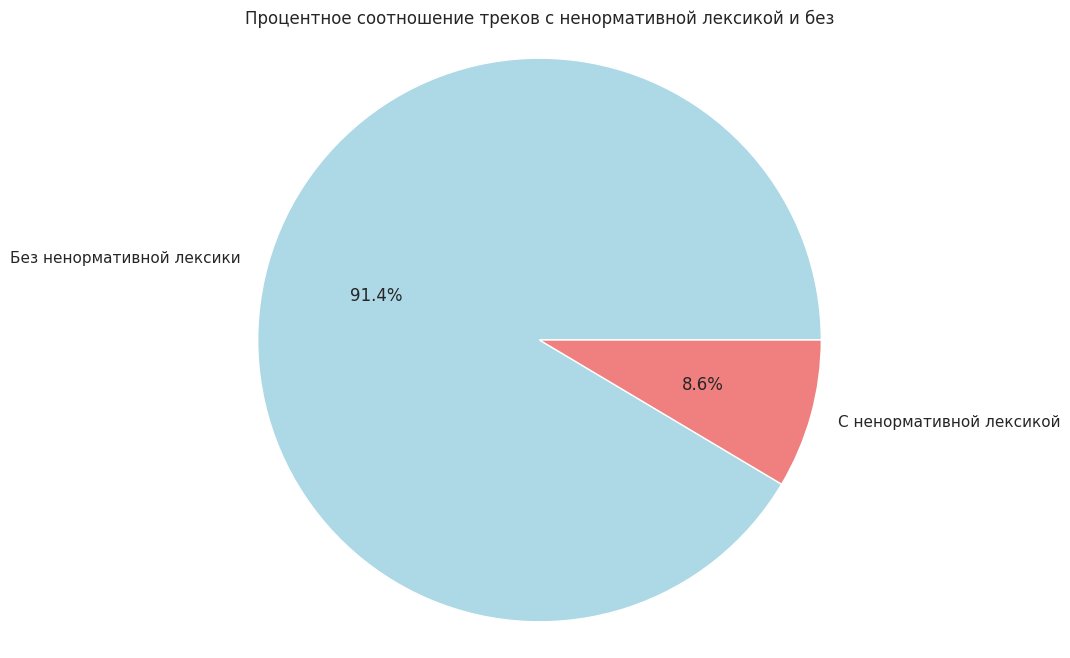

In [ ]:
explicit_counts = data['explicit'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(explicit_counts, labels=['Без ненормативной лексики', 'С ненормативной лексикой'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Процентное соотношение треков с ненормативной лексикой и без')
plt.axis('equal')  # Для равного соотношения осей


plt.show()

На графике видно, что более 90% всех треков без использования ненормативной лексики. В 8,6% треков используется ненормативная лексика

## Влияние наличия ненормативной лексики в треке на его популярность

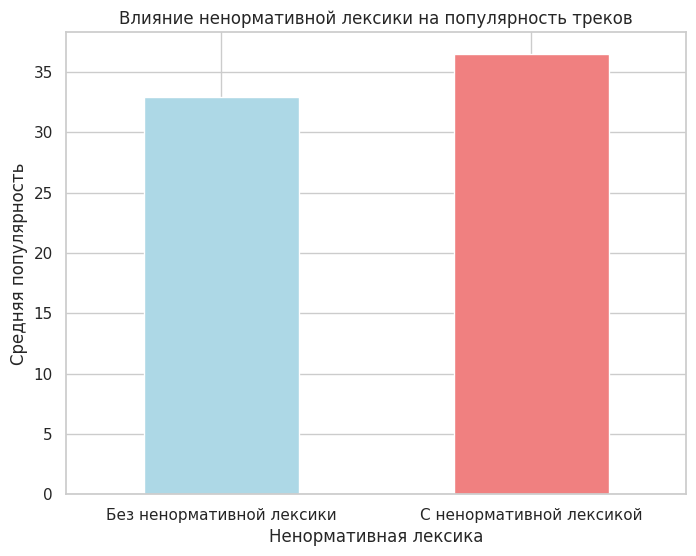

In [ ]:
popularity_by_explicit = data.groupby('explicit')['popularity'].mean()


plt.figure(figsize=(8, 6))
popularity_by_explicit.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Влияние ненормативной лексики на популярность треков')
plt.xlabel('Ненормативная лексика')
plt.ylabel('Средняя популярность')
plt.xticks(ticks=[0, 1], labels=['Без ненормативной лексики', 'С ненормативной лексикой'], rotation=0)


plt.show()

По графику можно сделать вывод, что треки с ненормативной лексикой имеют более высокую среднюю популярность по сравнению с треками без неё

## Влияние танцевальности и энергичности трека на его популярность

In [ ]:
bins = np.arange(0, 1.1, 0.1)

data_initial['dance_bin'] = pd.cut(data_initial['danceability'], bins=bins)
data_initial['energy_bin'] = pd.cut(data_initial['energy'], bins=bins)

heatmap_data = data_initial.groupby(['dance_bin', 'energy_bin']).popularity.mean().reset_index()

heatmap_pivot = heatmap_data.pivot(index='dance_bin', columns='energy_bin', values='popularity')

<ipython-input-134-df3b0e7bfbbf>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data_initial.groupby(['dance_bin', 'energy_bin']).popularity.mean().reset_index()


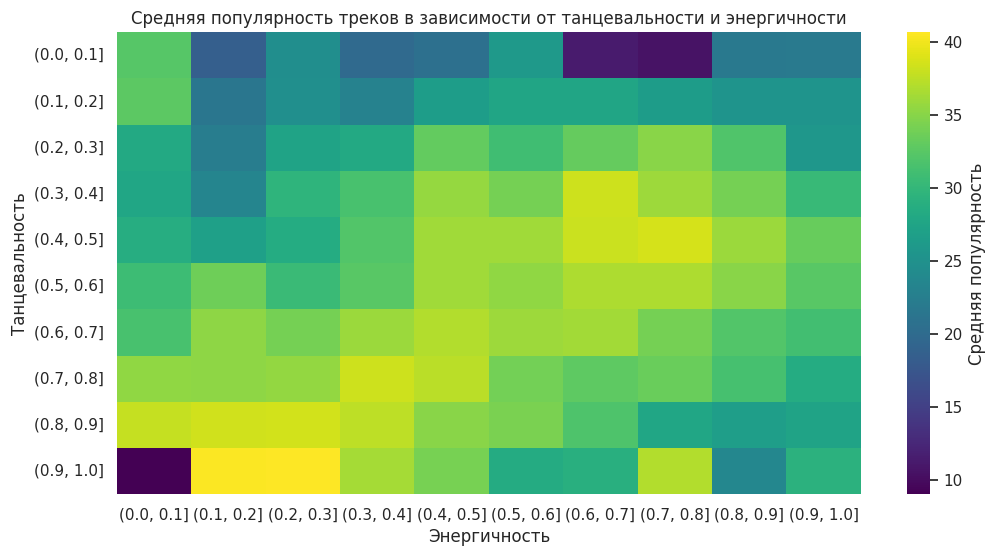

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_pivot,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Средняя популярность'}
)

plt.title('Средняя популярность треков в зависимости от танцевальности и энергичности')
plt.xlabel('Энергичность')
plt.ylabel('Танцевальность')
plt.show()

Видно, что наибольшая средняя популярность достигается при энергичности трека в диапазоне (0.1, 0.3] и танцевальности трека в диапазоне (0.9, 1.0]

Можно сказать, что данная комбинация признаков влияет на популярность

## Построение корреляционной матрицы всех признаков

In [ ]:
correlation_matrix = data.corr()

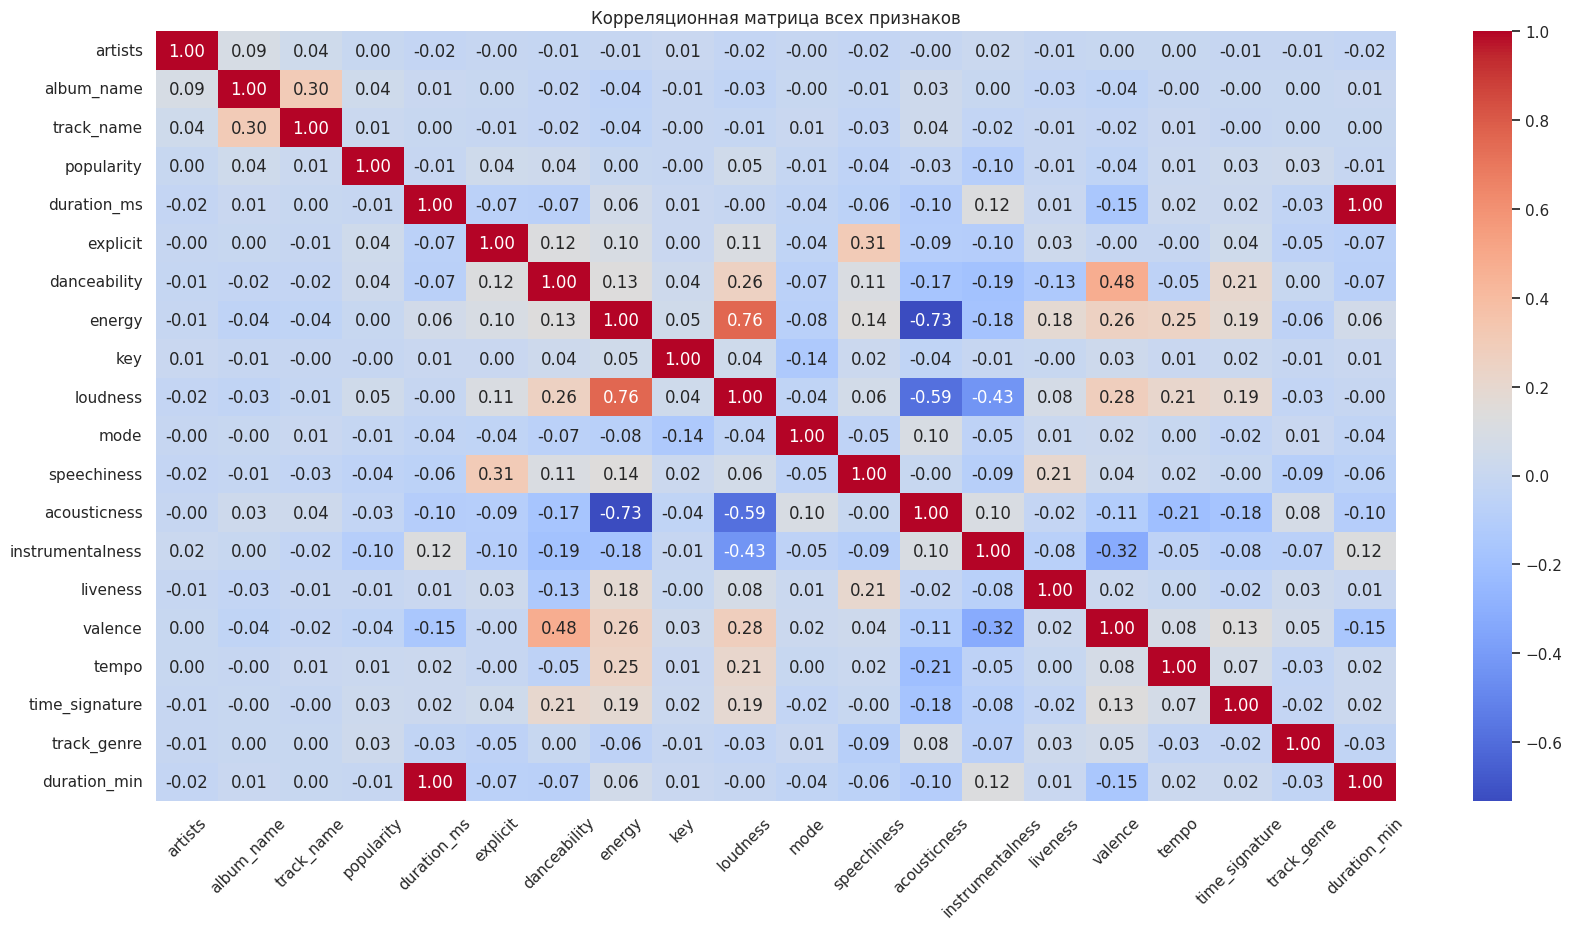

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица всех признаков")
plt.xticks(rotation=45)
plt.show()

Из данной корреляционной матрицы можно сделать следующие выводы:
  1. Популярность трека не коррелирует ни с одним из других признаков
  2. Положительная корреляция:
    * ***loudness*** и ***energy*** имеют значимую положительную корреляцию (0.76), что указывает на то, что энергичные треки являются более громкими



# Feature Engineering


> Добавить блок с цитатой



## Преобразование duration_min в One Hot Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  int64  
 1   album_name        113999 non-null  int64  
 2   track_name        113999 non-null  int64  
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

In [ ]:
import math
duration_min = data['duration_ms'] / 60000
max_duration = duration_min.max()

bins = [0, 1, 2, 3, 4, 5, 10, max_duration]
labels = ['0-1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', '5-10 min', '10+ min']

duration_category = pd.cut(duration_min, bins=bins, labels=labels, include_lowest=True)

Закодирую длительность трека с помощью One Hot Encoding

In [ ]:
duration_dummies = pd.get_dummies(duration_category, prefix='duration')

data = pd.concat([data, duration_dummies], axis=1)
data = data.drop('duration_ms', axis=1)

In [ ]:
data.iloc[0]

,0
artists,10357
album_name,8100
track_name,11741
popularity,73
explicit,False
danceability,0.676
energy,0.461
key,1
loudness,-6.746
mode,0


## Создание признака "Настроение-танцевальность"

In [ ]:
data['valence_dancebility'] = data['valence'] * data['danceability']

## Создание признака "Энергичность-танцевальность"

In [ ]:
data['energy_danceabilty'] = data['energy'] * data['danceability']

## Создание признака "Громкость-энергичность"

In [ ]:
data['loudness_energy'] = data['loudness'] * data['energy']

## Разбиение темпа трека на категории

In [ ]:
bins = [0, 40, 80, 120, 160, data['tempo'].max()]
labels = ['0-40 bpm', '40-80 bpm', '80-120 bpm', '120-160 bpm', '160+ npm']

tempo_category = pd.cut(data['tempo'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
duration_dummies = pd.get_dummies(tempo_category, prefix='tempo')

data = pd.concat([data, duration_dummies], axis=1)
data = data.drop('tempo', axis=1)

## Преобразование логических признаков в числовые

Для преобразования буду использовать LabelEncoder

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   artists              113999 non-null  int64  
 1   album_name           113999 non-null  int64  
 2   track_name           113999 non-null  int64  
 3   popularity           113999 non-null  int64  
 4   explicit             113999 non-null  bool   
 5   danceability         113999 non-null  float64
 6   energy               113999 non-null  float64
 7   key                  113999 non-null  int64  
 8   loudness             113999 non-null  float64
 9   mode                 113999 non-null  int64  
 10  speechiness          113999 non-null  float64
 11  acousticness         113999 non-null  float64
 12  instrumentalness     113999 non-null  float64
 13  liveness             113999 non-null  float64
 14  valence              113999 non-null  float64
 15  time_signature       1

In [ ]:
boolean_features = data.select_dtypes(include=['bool']).columns.tolist()

In [ ]:
boolean_features

['explicit',
 'duration_0-1 min',
 'duration_1-2 min',
 'duration_2-3 min',
 'duration_3-4 min',
 'duration_4-5 min',
 'duration_5-10 min',
 'duration_10+ min',
 'tempo_0-40 bpm',
 'tempo_40-80 bpm',
 'tempo_80-120 bpm',
 'tempo_120-160 bpm',
 'tempo_160+ npm']

In [ ]:
boolean_cols = data.select_dtypes(include=['bool']).columns

In [ ]:
for col in boolean_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   artists              113999 non-null  int64  
 1   album_name           113999 non-null  int64  
 2   track_name           113999 non-null  int64  
 3   popularity           113999 non-null  int64  
 4   explicit             113999 non-null  int64  
 5   danceability         113999 non-null  float64
 6   energy               113999 non-null  float64
 7   key                  113999 non-null  int64  
 8   loudness             113999 non-null  float64
 9   mode                 113999 non-null  int64  
 10  speechiness          113999 non-null  float64
 11  acousticness         113999 non-null  float64
 12  instrumentalness     113999 non-null  float64
 13  liveness             113999 non-null  float64
 14  valence              113999 non-null  float64
 15  time_signature       1

In [ ]:
data.iloc[0]

,0
artists,10357.000000
album_name,8100.000000
track_name,11741.000000
popularity,73.000000
explicit,0.000000
danceability,0.676000
energy,0.461000
key,1.000000
loudness,-6.746000
mode,0.000000


## Корреляция новых признаков с популярностью

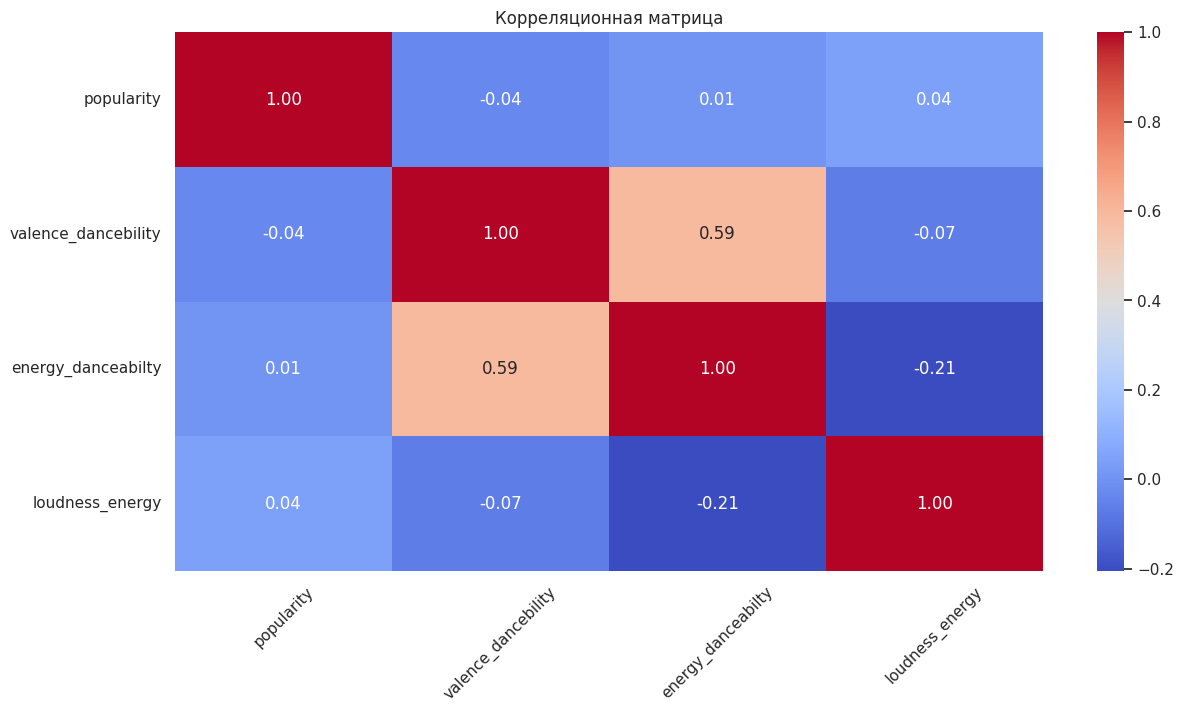

In [ ]:
features = ['popularity', 'valence_dancebility', 'energy_danceabilty', 'loudness_energy']

corr_matrix = data[features].corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.xticks(rotation=45)
plt.show()

1. На корреляционной матрице можно увидеть достаточно большую положительную корреляцию (0.59) у признаков *valence_danceability* и *energy_danceabilty*. Можно сделать вывод, что танцевальность, энергичность и настроение трека взаимосвязаны

# Обучение моделей

## Разбиение датасета на тренировочный и тестовый наборы

In [ ]:

X = data.drop(columns=['popularity', 'valence', 'time_signature',
                       'key', 'mode', 'liveness', 'duration_min', 'energy'])
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   artists              113999 non-null  int64  
 1   album_name           113999 non-null  int64  
 2   track_name           113999 non-null  int64  
 3   explicit             113999 non-null  int64  
 4   danceability         113999 non-null  float64
 5   loudness             113999 non-null  float64
 6   speechiness          113999 non-null  float64
 7   acousticness         113999 non-null  float64
 8   instrumentalness     113999 non-null  float64
 9   track_genre          113999 non-null  int64  
 10  duration_0-1 min     113999 non-null  int64  
 11  duration_1-2 min     113999 non-null  int64  
 12  duration_2-3 min     113999 non-null  int64  
 13  duration_3-4 min     113999 non-null  int64  
 14  duration_4-5 min     113999 non-null  int64  
 15  duration_5-10 min    1

In [ ]:
data.isnull().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
explicit,0
danceability,0
energy,0
key,0
loudness,0
mode,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
explicit,0
danceability,0
energy,0
key,0
loudness,0
mode,0


## Начало обучения


In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_validate
from scikeras.wrappers import KerasRegressor

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Функция для расчёта кросс-валидации и печати результатов

In [ ]:
def calculate_cross_validate(model):
    scoring = {
      'mse': 'neg_mean_squared_error',
      'r2': 'r2'
    }

    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    return results

def print_cross_validate(results):
    mse = -results['test_mse']
    r2 = results['test_r2']

    print("Средний MSE:", round(mse.mean(), 2))
    print("Лучший MSE:", round(mse.min(), 2))
    print()
    print("Средний R^2:", round(r2.mean(), 2))
    print("Лучший R^2:", round(r2.max(), 2))


## Модель 1

In [ ]:
# Создание модели
def create_model1():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])

    # Компиляция модели
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_model1()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,937 (31.00 KB)

 Trainable params: 7,937 (31.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 387.4777 - val_loss: 411.5486
Epoch 2/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 384.6410 - val_loss: 409.8193
Epoch 3/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 383.0800 - val_loss: 409.3156
Epoch 4/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 379.1333 - val_loss: 403.1812
Epoch 5/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 378.6083 - val_loss: 404.9514
Epoch 6/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 375.3918 - val_loss: 400.7383
Epoch 7/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 373.7753 - val_loss: 401.0380
Epoch 8/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 371.6824 - val_loss: 399.0714
Epoch 9/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 372.5225 - val_loss: 401.0664
Epoch 10/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 363.6164 - val_loss: 398.2356
Epoch 11/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 367.4

In [ ]:
# Оценка модели
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 395.2429
Test Loss: 392.8964538574219


### Результаты

In [ ]:
y_test.value_counts()

,count
popularity,
0,3228
21,482
22,459
44,455
1,450
...,...
95,2
91,1
93,1


In [ ]:
y_test.shape

(22800,)

In [ ]:
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Средняя абсолютная ошибка MAE: {mae:.2f}')
print(f'Среднеквадратичная ошибка MSE: {mse:.2f}')
print(f'Корень среднеквадратичной ошибки RMSE: {rmse:.2f}')
print(f'Коэффициент детерминации R2: {r2:.2f}')
print(f'Средняя абсолютная процентная ошибка MAPE: {mape:.2f}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Средняя абсолютная ошибка MAE: 15.63
Среднеквадратичная ошибка MSE: 392.90
Корень среднеквадратичной ошибки RMSE: 19.82
Коэффициент детерминации R2: 0.21
Средняя абсолютная процентная ошибка MAPE: 16234385026613960.00%


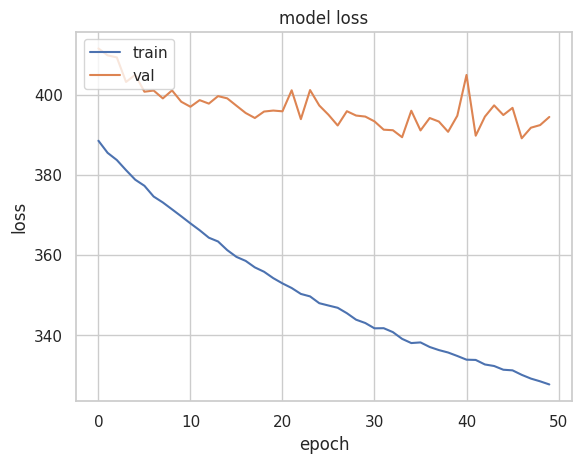

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Посчитаем важность признаков

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━

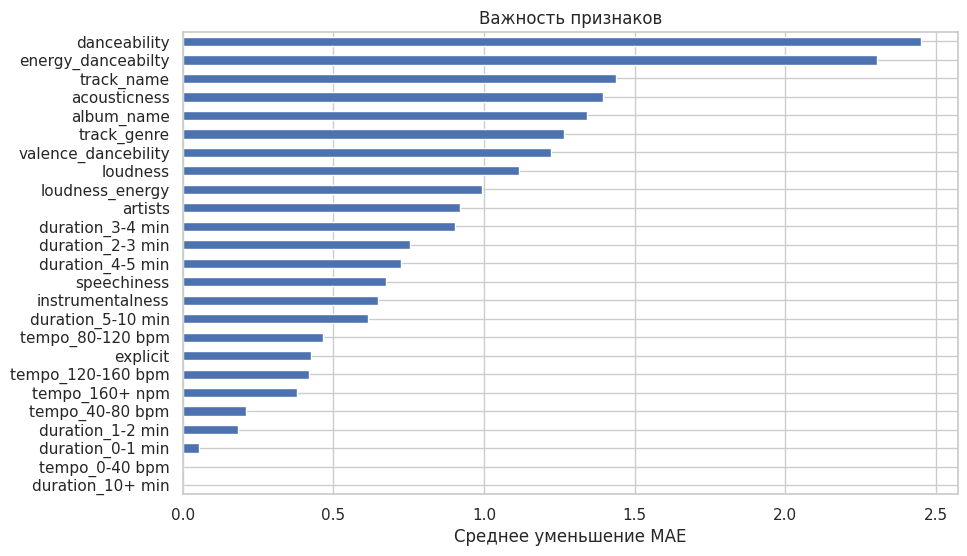

In [ ]:

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=32, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

На графике видно, что важные признаки  - "Танцевальность", "Энергичность-танцевальность" и "Название трека"

In [ ]:
model_wrapper1 = KerasRegressor(model=create_model1, epochs=50, batch_size=32, verbose=0)

In [ ]:
cross_val_model1 = calculate_cross_validate(model_wrapper1)
print_cross_validate(cross_val_model1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Модель 2

В этой модели ввел дополнительные слои и Dropout(). Также увеличим количество эпох

In [ ]:
# Создание модели
def create_model2():
    model2 = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1)
    ])

    # Компиляция модели
    model2.compile(optimizer='adam', loss='mean_squared_error')

    return model2

model2 = create_model2()

In [ ]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение модели
history2 = model2.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2)

Epoch 1/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 637.8018 - val_loss: 474.7581
Epoch 2/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 506.0639 - val_loss: 464.3070
Epoch 3/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 501.0685 - val_loss: 460.5554
Epoch 4/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 496.5553 - val_loss: 460.1030
Epoch 5/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 490.2336 - val_loss: 452.2739
Epoch 6/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 483.6919 - val_loss: 452.7955
Epoch 7/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 481.1761 - val_loss: 451.7969
Epoch 8/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 476.8280 - val_loss: 456.8325
Epoch 9/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 472.7253 - val_loss: 449.6311
Epoch 10/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 480.4763 - val_loss: 444.3377
Epoch 11/80
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 470.4515 

In [ ]:
# Оценка модели
loss = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 382.8942
Test Loss: 379.2372741699219


### Результаты

In [ ]:
y_test.value_counts()

,count
popularity,
0,3228
21,482
22,459
44,455
1,450
...,...
95,2
91,1
93,1


In [ ]:
y_test.shape

(22800,)

In [ ]:
# Прогнозирование на тестовых данных
y_pred = model2.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 15.54
MSE: 379.24
RMSE: 19.47
R2: 0.24
MAPE: 15309774242019836.00%


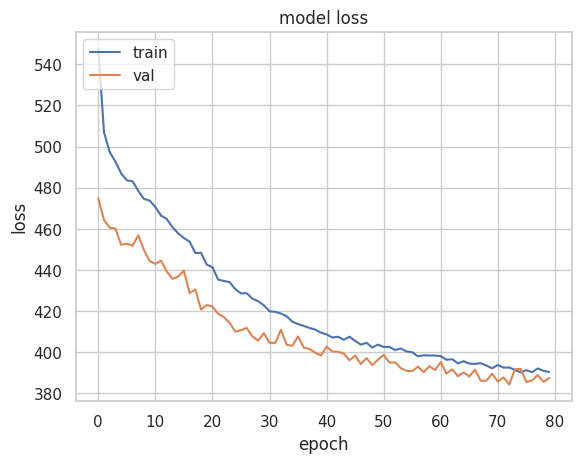

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

По графику можно сказать, что переобучения нет

Посчитаем важность признаков с помощью permutation importance и визуализируем

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

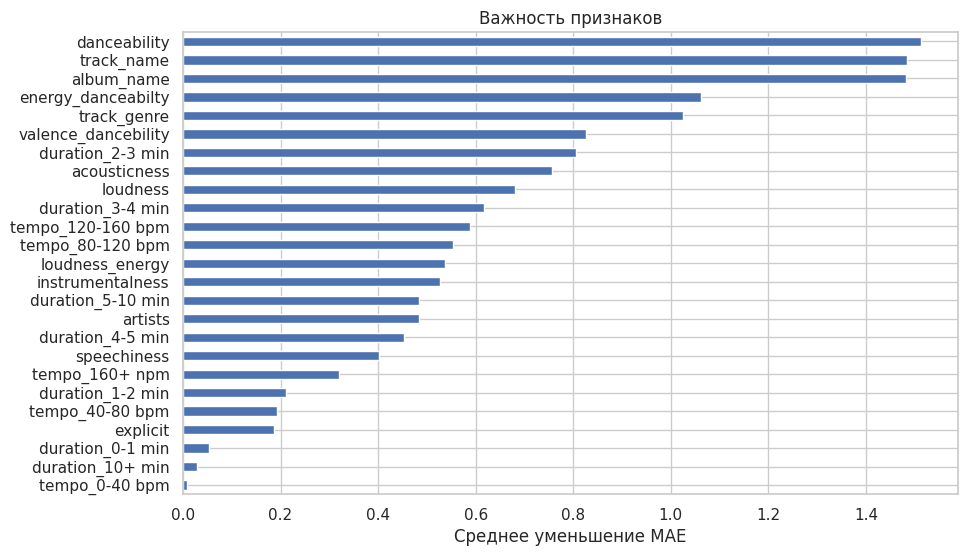

In [ ]:

result = permutation_importance(model2, X_test, y_test, n_repeats=5, random_state=32, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Одни из самых важных признаков - "Танцевальность", "Название трека" и "Название альбома"

### Кросс-валидация

In [ ]:
model_wrapper2 = KerasRegressor(model=create_model2, epochs=100, batch_size=32, verbose=0)

In [ ]:
cross_val_model2 = calculate_cross_validate(model_wrapper2)
print_cross_validate(cross_val_model2)

## Линейная регресия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_linear_regression():
  linear_regression = LinearRegression()

  return linear_regression

linear_regression = create_linear_regression()

In [ ]:
linear_regression.fit(X_train, y_train)

LinearRegression()

### Результаты

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = linear_regression.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 18.28
MSE: 481.58
RMSE: 21.94
R2: 0.03
MAPE: 21300619703938776.00%


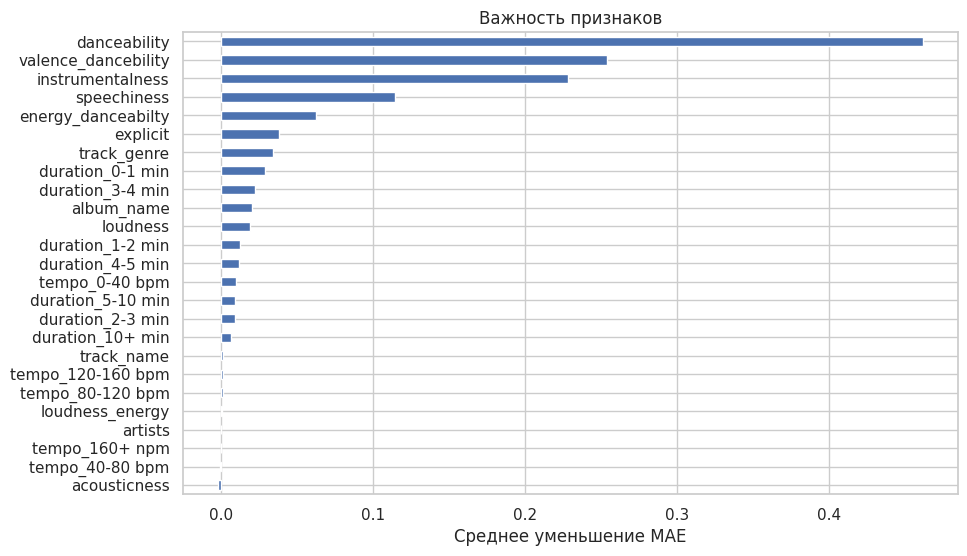

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(linear_regression, X_test, y_test, n_repeats=5, random_state=32, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Самыми важными признаками являются:"Танцевальность", "Настроение-танцевальность" и "Инструментальность"

### Кросс-валидация

In [ ]:
cross_validate_linear = calculate_cross_validate(create_linear_regression())
print_cross_validate(cross_validate_linear)

## Random Forest

Для подбора параметров использовал GridSearch. После нахождения оптимальных параметров, решил создавать модель с этими параметрами, а код GridSearch закомментировал (для экономии времени).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def create_random_forest():
  random_forest = RandomForestRegressor(
      random_state=42,
      max_depth=14,
      min_samples_leaf=1,
      min_samples_split=2,
      n_estimators=15
  )

  return random_forest

random_forest = create_random_forest()

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=15, random_state=42)

### Результаты

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = random_forest.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 13.74
MSE: 309.71
RMSE: 17.60
R2: 0.38
MAPE: 13446025069625536.00%


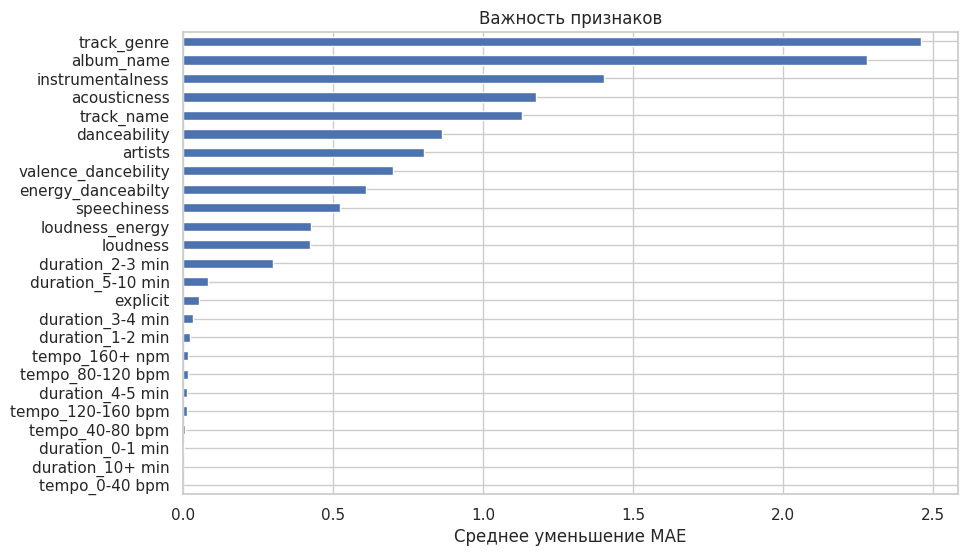

In [ ]:
result = permutation_importance(random_forest, X_test, y_test, n_repeats=5, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Одними из самых важных признаков являются: "Жанр трека", "Название альбома" и "Инструментальность трека"

### Кросс-валидация

In [ ]:
cross_val_random_forest = calculate_cross_validate(create_random_forest())
print_cross_validate(cross_val_random_forest)

## Градиентный бустинг

Для подбора параметров использовал GridSearch. После нахождения оптимальных параметров, решил создавать модель с этими параметрами, а код GridSearch закомментировал (для экономии времени).

In [ ]:
from xgboost import XGBRegressor

In [ ]:
def create_xgb():
  xgb = XGBRegressor(
      random_state=42,
      colsample_bytree=1.0,
      learning_rate=0.2,
      max_depth=7,
      n_estimators=300,
      subsample=1.0
  )
  return xgb

xgb = create_xgb()

In [ ]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Лучшие параметры LightGBM: `{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}`

Лучшее значение ошибки (MSE): 203.37820067583917

### Результаты

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = xgb.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 10.17
MSE: 186.92
RMSE: 13.67
R2: 0.62
MAPE: 8434966410754670.00%


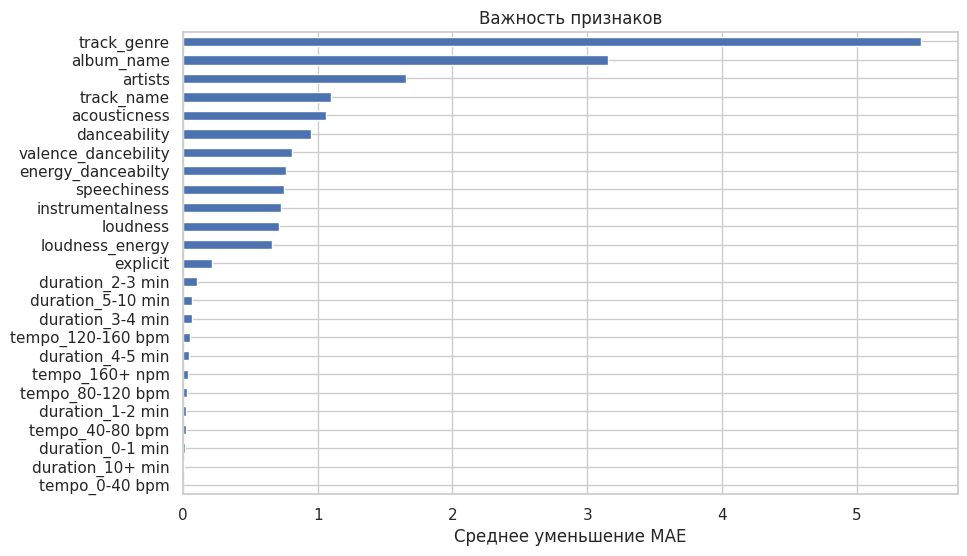

In [ ]:
result = permutation_importance(xgb, X_test, y_test, n_repeats=5, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Самыми важными признаками являются: "Жанр трека", "Название альбома" и "Артист"

### Кросс-валидация

In [ ]:
cross_val_xgb = calculate_cross_validate(create_xgb())
print_cross_validate(cross_val_xgb)

# Результаты моделей

In [ ]:
print('model1')
print('='*20)
print_cross_validate(cross_val_model1)
print('='*20)
print()

print('model2')
print('='*20)
print_cross_validate(cross_val_model2)
print('='*20)
print()

print('Линейная')
print('='*20)
print_cross_validate(cross_validate_linear)
print('='*20)
print()

print('Random Forest')
print('='*20)
print_cross_validate(cross_val_random_forest)
print('='*20)
print()

print('Градиентный бустинг')
print('='*20)
print_cross_validate(cross_val_xgb)

model1


NameError: name 'cross_val_model1' is not defined

1. Модель 1:
     * Наилучший MSE: 392.02
     * Средний R²: 0.19 - свидетельствует о низкой объясняющей способности
    
2. Модель 2:
     * Наилучший MSE: 375.19
     * Средний R²: 0.21 - выше, чем у модели 1, но всё ещё недостаточно для достижения хорошего качества

3. Линейная модель:
   * Наилучший MSE: 481.12
   * Средний R²: 0.03 - показывает, что линейная модель не способна объяснить сложные зависимости

4. Random Forest:
   * Наилучший MSE: 309.71
   * Средний R²: 0.38 - значительное улучшение по сравнению с нейронными сетями

  
5. Градиентный бустинг (XGBoost):
   * Наилучший MSE: 186.92 - наилучший показатель среди всех моделей
   * Средний R²: 0.62 - указывает на высокую способность модели к объяснению данных

Модель, показавшая лучшие результаты - градиентный бустинг XGBoost